In [1]:
import numpy as np
from math import pi
from matplotlib import pyplot
from scipy.linalg import block_diag
from ipywidgets import interact

In [110]:
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3
m0=9.1e-31 # kg
m=m0/10

vF=1e5
B=10 # Tesla
hwc=hbar*(elec*B/m)
lB=np.sqrt(hbar/(elec*B))
mu_sc=-2*hwc #1e2*meV
D_sc=2*hwc #10*meV
nu=3
mu_n=nu*hwc #10*meV

ky_sw=np.linspace(-6,12,140)/lB


Lx=10*lB
Nx=100
kx=2*pi*np.arange(Nx)/(2*Lx)-pi*Nx/(2*Lx)
[k1,k2]=2*pi*np.mgrid[range(Nx),range(Nx)]/(2*Lx)-pi*Nx/(2*Lx)


def y2(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c= (-2j+np.exp(1j*k*Lx)*(2j+ 2*k*Lx- 1j* k**2 * Lx**2))/ (k**3) /(2*Lx)
        c[ ~ np.isfinite( c )] = Lx**2 /6.0
    return c

def y1(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = (-1+np.exp(1j*k*Lx)*(1- 1j* k * Lx))/ (k**2) /(2*Lx)
        c[ ~ np.isfinite( c )] = Lx/4.0
    return c

def y0(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = -1j*(-1+np.exp(1j*k*Lx) )/(k*2*Lx)
        c[ ~ np.isfinite( c )] = 0.5
    return c

def y0s(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = 1j*(-1+np.exp(-1j*k*Lx) )/(k*2*Lx)
        c[ ~ np.isfinite( c )] = 0.5
    return c

sigma1=np.array([[0,1],[1,0]])
sigma2=np.array([[0,-1j],[1j,0]])
sigma3=np.array([[1,0],[0,-1]])

# HeB= vF*elec*B* np.kron(y1(k1-k2), np.array([[0,1],[0,0]]))
HeB= -vF*elec*B* np.kron(y1(k1-k2), sigma1)
Hxd= hbar*vF*np.kron(k1*y0(k1-k2) , sigma2)
Hxq= np.kron( (hbar**2/(2*m)*(k1**2)-mu_sc) *y0(k2-k1) , np.eye(2))
# Hxq= -mu_sc * np.kron( y0(k2-k1) , np.eye(2))
# Hxd= hbar*vF*np.kron(np.diag(kx) , sigma2)

# HeB2= ((elec*B)**2 *y2(k1-k2))/ (2*m)
# HeB2T= ((elec*B)**2 *y2(k2-k1))/ (2*m)
# Hef= -( mu_n*y0(k1-k2) + mu_sc*y0(k2-k1) ),np.
# HefT= -( mu_n*y0(k2-k1) + mu_sc*y0(k1-k2) )
# Hd= D_sc*y0(k2-k1) 
# Hd= D_sc*np.eye(Nx)


En=np.zeros((2*Nx,len(ky_sw)))
Vn=np.zeros((2*Nx,2*Nx,len(ky_sw)), dtype=np.complex64)
for i_y in range(len(ky_sw)):
    ky=ky_sw[i_y]
#     Hy= np.kron(hbar*vF*ky*np.eye(Nx), sigma1)
    Hyd= np.kron(hbar*vF*ky*y0(k1-k2), sigma1)
    Hyq= np.kron(hbar**2/(2*m)*(ky**2)*y0(k2-k1), np.eye(2))

    H_t = Hxq + Hyq + Hxd + (Hyd + HeB + np.transpose(HeB).conj())
#     H_t = Hx + Hy + HeB + np.transpose(HeB).conj()
#     H1T=Hx+Hy+(HeB2T+HeB1T+HefT).conj()
#     Hd_mat=np.kron(np.array([[0.,1.0],[0.,0.]]),Hd)
#     H_t=block_diag(H1,-H1T)+Hd_mat+np.transpose(Hd_mat).conj()
    En[:,i_y], Vn[:,:,i_y] =np.linalg.eigh(H_t)
    
print("Done!")

Done!


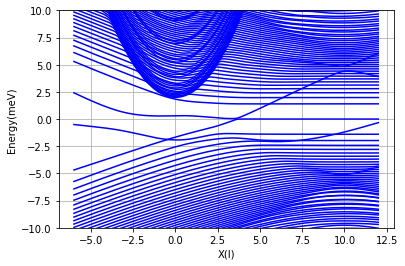

In [111]:
def wf_real_space(ev,k,x,Lx):
    Nx=len(k)
    kt=np.reshape(k,[1,Nx])
    xt=np.reshape(x,[len(x),1])
    return np.dot(np.exp(1j*kt*(xt)),ev[:Nx,:])/np.sqrt(2*Lx)*np.sqrt(x[1]-x[0])

def plot_wf(i_band=Nx,iwf=int(3*len(ky_sw)/4)):
# iwf=0
    pyplot.figure()
#     pyplot.subplot(2,1,1)
    pyplot.plot(ky_sw*lB,En.T/hwc,'b')
#     pyplot.plot(ky_sw[iwf]*lB,En[i_band,iwf]/hwc,'ro')
    pyplot.ylabel("Energy(meV)")
    pyplot.xlabel("X(l)")
    pyplot.ylim(-10,10)
    # pyplot.xlim(-7.5,7.5)
    pyplot.grid()
#     pyplot.show()

#     x0=np.linspace(-1,1,500)*10*lB
# #     wf1_p=wf_real_space(np.reshape(Vn[:,i_band,:],[Nx,len(ky_sw)]),kx,x0,Lx)
# #     pyplot.figure()
#     pyplot.subplot(2,1,2)
#     pyplot.plot(x0/lB,np.abs(wf1_p[:,iwf])**2)
# #     pyplot.plot(x0/lB,np.abs(wf1_h[:,iwf])**2)
#     pyplot.title('ky=%.2f' % (ky_sw[iwf]*lB) )
    pyplot.show()
    
plot_wf(0,0)

interactive(children=(Dropdown(description='i_band', options=(0, 1, 2), value=0), IntSlider(value=105, descrip…

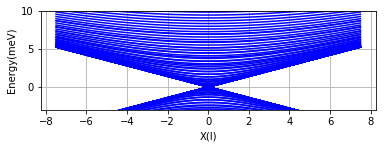

In [20]:
interact(plot_wf,iwf=(0,len(ky_sw)-1,1), i_band=range(nu));
#, continuous_update=False);

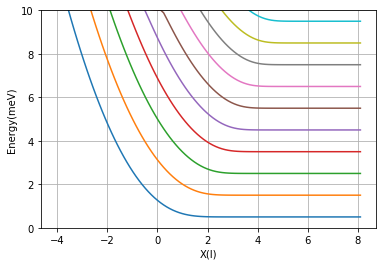

In [473]:
pyplot.figure()
# pyplot.plot(ky_sw/1e9,En.T/meV)
pyplot.plot(ky_sw*lB,En.T/hwc)
pyplot.ylabel("Energy(meV)")
# pyplot.xlabel("ky(1/nm)")
pyplot.xlabel("X(l)")
pyplot.ylim(0,10)
# pyplot.xlim(-7.5,7.5)
pyplot.grid()
pyplot.show()

In [301]:
a=np.reshape(range(4),[2,2])
b=np.reshape(range(4,8),[2,2])
Hd=sigma2+1j*sigma3
x=block_diag(a,b)+np.kron(np.array([[0.,1.0],[0.,0.]]),Hd)+np.kron(np.array([[0.,0.],[1.0,0.]]),np.transpose(Hd).conj())
print(x)

[[0.+0.j 1.+0.j 0.+1.j 0.-1.j]
 [2.+0.j 3.+0.j 0.+1.j 0.-1.j]
 [0.-1.j 0.-1.j 4.+0.j 5.+0.j]
 [0.+1.j 0.+1.j 6.+0.j 7.+0.j]]


In [348]:
print(D_sc/meV)

0.0
